In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])

leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

# Synthesys begins

In [12]:
print(gameX.shape)
print(leaderX.shape)

(80000, 47)
(25000, 47)


In [13]:
gameX = gameX.assign(var345 = (1+gameX['mvar3'])*(1+gameX['mvar4'])*(1+gameX['mvar5']))
leaderX = leaderX.assign(var345 = (1+leaderX['mvar3'])*(1+leaderX['mvar4'])*(1+leaderX['mvar5']) )

In [14]:
print(gameX.shape)
print(leaderX.shape)

(80000, 48)
(25000, 48)


In [15]:
gameX  = gameX.assign(mvar678 = (gameX['mvar7'] + gameX['mvar8'])/(1+gameX['mvar6']))
leaderX = leaderX.assign(mvar678 = (leaderX['mvar7'] + leaderX['mvar8'])/(1+leaderX['mvar6']))

In [16]:
print(gameX.shape)
print(leaderX.shape)

(80000, 49)
(25000, 49)


In [17]:
#mvar36, 37, 38

In [18]:
df = gameX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
gameX = df.copy()



df = leaderX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
leaderX = df.copy()


In [19]:
print(gameX.shape)
print(leaderX.shape)

(80000, 50)
(25000, 50)


In [20]:
gameX = gameX.assign(var363738 = (gameX['mvar36']*gameX['mvar37']/(1+gameX['mvar38'])) )
leaderX = leaderX.assign(var363738 = (leaderX['mvar36']*leaderX['mvar37']/(1+leaderX['mvar38']) ) )

In [21]:
print(gameX.shape)
print(leaderX.shape)

(80000, 51)
(25000, 51)


In [ ]:
#drop
df = gameX.copy() 
leader_df = leaderX.copy()
drop_target = ['mvar37', 'mvar38', 'mvar4', 'mvar5']
#number of misssing values
# for i in df.columns:
#     if (100*(80000-gameDf[i].describe()['count'])/80000) > 

In [ ]:
for i in drop_target:
    del df[i]
    del leader_df[i]

In [ ]:
leader_df.columns

In [ ]:
gameX = df
leaderX = leader_df 

# Synthesis Ends

In [22]:
print(gameX.shape)
print(leaderX.shape)

(80000, 51)
(25000, 51)


In [23]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,var345,mvar678,var37,var363738
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,0.42105,3.0,0.856610,0.070736,0.000000,0,1.000000,93.647343,0.090400,16.500000
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,0.00000,15.0,0.943910,0.000000,0.000000,1,1.000000,133.020134,0.090400,9.000000
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,0.33333,3.0,0.764670,0.000000,0.000000,1,1.000000,17.373737,0.159852,6.000000
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,1.50000,0.0,0.705285,0.070736,0.096135,1,6.299000,2583.839092,0.381028,0.000000
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,0.00000,23.0,0.791900,0.000000,0.000000,0,1.000000,43.088889,0.381028,0.000000
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,0.00000,21.0,0.924620,0.000000,0.000000,0,1.241000,28.329558,0.090400,53.200000
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,0.00000,14.0,0.713470,0.000000,0.000000,0,1.272000,49.520101,0.102641,10.285714
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,0.00000,15.0,0.924030,0.000000,0.000000,0,1.000000,124.816901,0.090400,7.000000
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,0.00000,5.0,0.897600,0.000000,0.096135,0,1.000000,5.227680,0.186923,3.000000
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,0.05882,14.0,0.405290,0.070736,0.000000,1,1.000000,2685.000000,0.309995,0.600000


In [24]:
#BREAK OPEN

In [25]:
#Method 3

In [26]:
#current

In [42]:
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]

print('running cross validation')

print('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    param['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold

###
# you can also do cross validation with customized loss function
# See custom_objective.py
##
print('running cross validation, with cutomsized loss function')
#Custom
# wt = 0.5
# def logregobj(preds, dtrain):
#     labels = dtrain.get_label()
#     preds = 1.0 / (1.0 + np.exp(-preds))
#     grad = wt*(1.0-labels)*preds - (1-wt)*labels*(1-preds)
#     hess = preds * (1.0 - preds) * (wt*(1.0-labels)+(1.0-wt)*labels)
#     return grad, hess

def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

t = time.time()
# CV to find optimum number of boosted trees (num_round)
cvresult = xgb.cv(
            param, #param set by user
            dtrain, #train set
            num_round, #max number of boosted tree, >early_stopping_round
            nfold=n_fold, #n fold CV
            seed=0, 
            obj=logregobj, #custom loss func
            feval=evalerror, #custom eval metric
            callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                       xgb.callback.early_stop(early_stopping_rounds)], #decides optimum number of boosted trees, <num_round
#             fpreproc=fpreproc, #function for preprocessing
            )

num_round = cvresult.shape[0] #optimum number of boosted trees
# bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror, fpreproc=fpreproc)
bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror)

print("time taken:", time.time()-t)

running cross validation
running cross validation, with preprocessing function
running cross validation, with cutomsized loss function
[0]	train-error:0.753787	test-error:0.753787
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 50 rounds.
[1]	train-error:0.753787	test-error:0.753787
[2]	train-error:0.393109	test-error:0.395537
[3]	train-error:0.2788	test-error:0.280187
[4]	train-error:0.239428	test-error:0.2415
[5]	train-error:0.214794	test-error:0.217775
[6]	train-error:0.20749	test-error:0.210262
[7]	train-error:0.203712	test-error:0.206175
[8]	train-error:0.201859	test-error:0.204537
[9]	train-error:0.200634	test-error:0.203288
[10]	train-error:0.200072	test-error:0.202575
[11]	train-error:0.199662	test-error:0.202338
[12]	train-error:0.198912	test-error:0.201425
[13]	train-error:0.198641	test-error:0.201687
[14]	train-error:0.198103	test-error:0.201163
[15]	train-error:0.198031	test-error:0.200913

[173]	train-error:0.175709	test-error:0.1908
[174]	train-error:0.175569	test-error:0.190737
[175]	train-error:0.175419	test-error:0.190638
[176]	train-error:0.175359	test-error:0.190738
[177]	train-error:0.175272	test-error:0.190687
[178]	train-error:0.175219	test-error:0.190663
[179]	train-error:0.175063	test-error:0.19055
[180]	train-error:0.174922	test-error:0.190613
[181]	train-error:0.174822	test-error:0.19075
[182]	train-error:0.174784	test-error:0.190875
[183]	train-error:0.174706	test-error:0.190925
[184]	train-error:0.174731	test-error:0.19095
[185]	train-error:0.174584	test-error:0.190975
[186]	train-error:0.1745	test-error:0.191012
[187]	train-error:0.174438	test-error:0.190875
[188]	train-error:0.174322	test-error:0.190837
[189]	train-error:0.174219	test-error:0.190913
[190]	train-error:0.174147	test-error:0.1909
[191]	train-error:0.174075	test-error:0.190988
[192]	train-error:0.173909	test-error:0.190925
[193]	train-error:0.173784	test-error:0.19095
[194]	train-error:0.173

[121]	eval-error:0.181113	train-error:0.181113
[122]	eval-error:0.180938	train-error:0.180938
[123]	eval-error:0.180838	train-error:0.180838
[124]	eval-error:0.18075	train-error:0.18075
[125]	eval-error:0.180775	train-error:0.180775
[126]	eval-error:0.18075	train-error:0.18075
[127]	eval-error:0.180712	train-error:0.180712
[128]	eval-error:0.180712	train-error:0.180712
[129]	eval-error:0.180688	train-error:0.180688
[130]	eval-error:0.180588	train-error:0.180588
[131]	eval-error:0.180388	train-error:0.180388
[132]	eval-error:0.180487	train-error:0.180487
[133]	eval-error:0.180363	train-error:0.180363
[134]	eval-error:0.180388	train-error:0.180388
[135]	eval-error:0.180338	train-error:0.180338
[136]	eval-error:0.180138	train-error:0.180138
[137]	eval-error:0.180037	train-error:0.180037
[138]	eval-error:0.179825	train-error:0.179825
[139]	eval-error:0.179987	train-error:0.179987
[140]	eval-error:0.17985	train-error:0.17985
[141]	eval-error:0.179938	train-error:0.179938
[142]	eval-error:0.

In [57]:
#910k
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]


def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)


param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 0.8, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 0.25, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

num_round = 231

bst = xgb.train(param, dtrain, num_round, obj=logregobj, feval=evalerror)

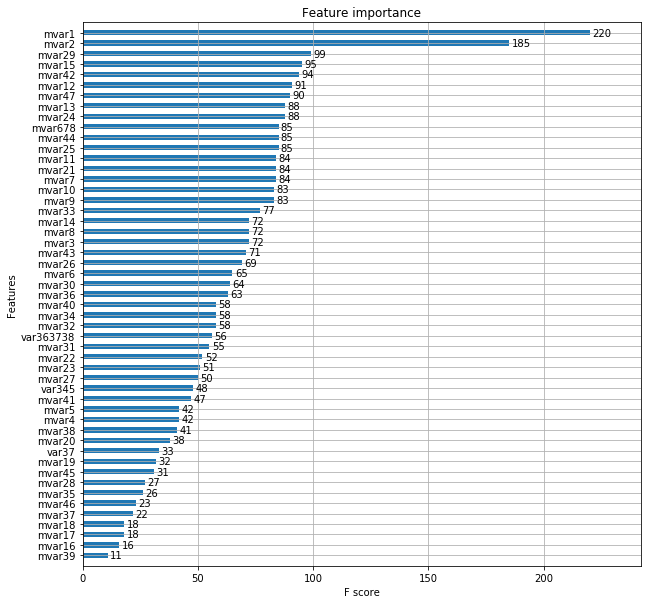

In [28]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

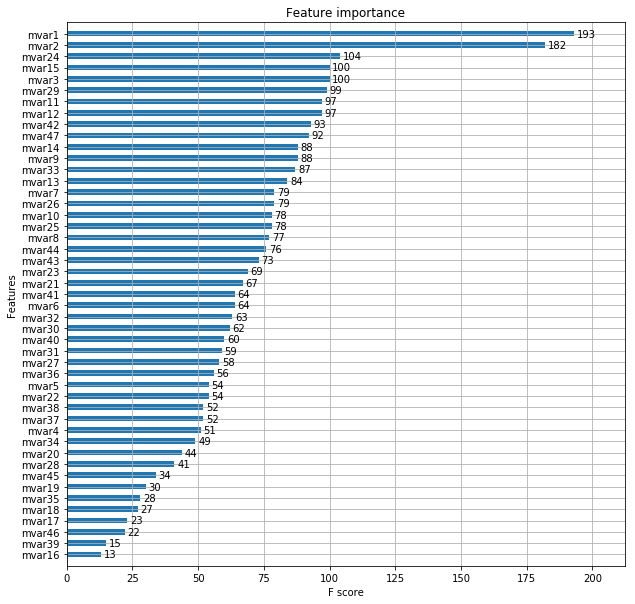

In [31]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

In [43]:
cvresult.shape[0]

180

In [58]:
bst.predict(dtrain)

array([-0.87067413, -2.39639473, -1.13932025, ...,  1.13650513,
       -1.57275677, -0.76263511], dtype=float32)

In [59]:
1/(1+np.exp(-bst.predict(dtrain)))

array([ 0.29511404,  0.08344803,  0.2424452 , ...,  0.7570374 ,
        0.17182375,  0.31807443], dtype=float32)

In [60]:
dtest = xgb.DMatrix(leaderX)
# pred = bst.predict(leaderXxgb)

In [61]:
pred = 1/(1+np.exp(-bst.predict(dtest)))

In [62]:
pred = pd.DataFrame(pred)
pred['application_key'] = leaderAppID
pred.shape

(25000, 2)

In [63]:
pred

,0,application_key
0,0.058722,350053
1,0.045906,350054
2,0.100979,350055
3,0.687089,350056
4,0.116513,350057
5,0.006375,350058
6,0.054875,350059
7,0.004410,350060
8,0.006738,350061
9,0.246823,350062


In [64]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

In [65]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [66]:
pred = pred.loc[:,'application_key':]

In [67]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [68]:
# submit.iloc[-400:, 1] = 1

In [69]:
submit

,application_key,0
22292,372345,0
15480,365533,0
3708,353761,0
23797,373850,0
10071,360124,0
19117,369170,0
3323,353376,0
22268,372321,0
4599,354652,0
11416,361469,0


In [70]:
submit.to_csv('flabbergasted_IITGuwahati_289.csv',header = False, index = False)